<a href="https://colab.research.google.com/github/VishnuVardhanNutalapati/Datamining-project/blob/main/DMProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mounting google drive to google colab
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

**Description of various models used**

---
**NUMPY:**
> This module is mainly used for scientific computations which includes functions for linear algebra,Multi-dimensional arrays, fourier transform etc.,
---
**Pandas:**

> Pandas is a Python library used for working with datasets which includes functions for analyzing, cleaning, exploring and manipulating data.

---
**Scikit-learn:**
>Scikit-learn is an open source machine learning library that supports supervised and unsupervised learning which provides various tools for model fitting, data processing, model selection and evaluation and many other utilities.
---
**Matplotlib:**
>Matplotlib is a comprehensive library for creating static, animated and interactive visulizations in python.
---
**Seaborn:**
>Seaborn is a Python visualization library based on matplotlib.






In [ ]:
#Loading the dataset
df=pd.read_csv("/content/drive/MyDrive/data1.csv")
df=df.iloc[0:569, 0:32]

**DATA PREPROCESSING**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [ ]:
#Removing unimportant columns data
df=df.iloc[:,1:]
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


B    357
M    212
Name: diagnosis, dtype: int64


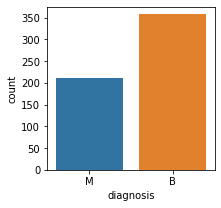

In [ ]:
#observing Target variable data
plt.figure(figsize=(3,3))
sns.countplot(x='diagnosis',data=df)
print(df['diagnosis'].value_counts())

In [ ]:
#Replacing Target labels with 0 and 1
df.iloc[:,0].replace('M',1,inplace=True)
df.iloc[:,0].replace('B',0,inplace=True)

In [ ]:
#Finding correlation between each attribute
corr=df.corr()
corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


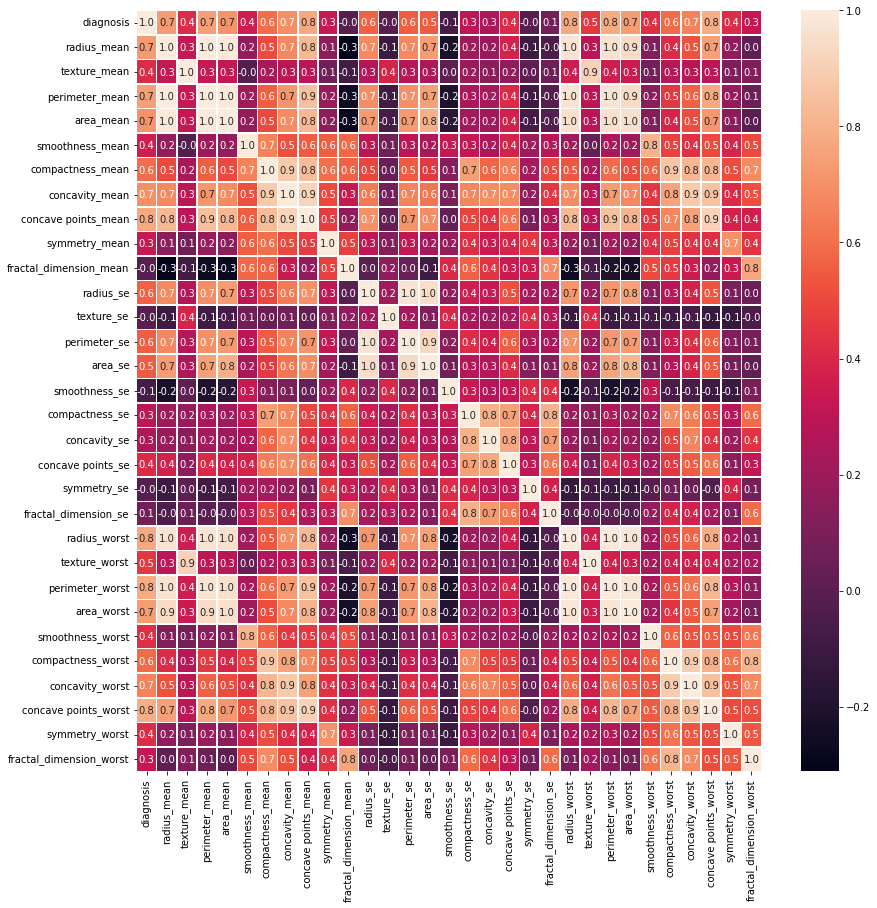

In [ ]:
#Visualizing the correlation through heatmap
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True,linewidths=0.5,fmt='.1f')

In [ ]:
#Removal of more correlated columns
col=['radius_worst','texture_worst','perimeter_worst', 'area_worst',
     'smoothness_worst','compactness_worst','concavity_worst', 'concave points_worst',
     'symmetry_worst','fractal_dimension_worst','perimeter_mean','area_mean',
     'perimeter_se','area_se','concavity_mean','concave points_mean','concavity_se',
     'concave points_se']

df=df.drop(col,axis=1)
print(df.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'symmetry_se', 'fractal_dimension_se'],
      dtype='object')


In [ ]:
#Dividing the dataset into features and target
X=df.iloc[:,1:]
y=df.iloc[:,0]

print(X.shape)
print(y.shape)

(569, 12)
(569,)


**SPLITTING DATASET INTO TRAINING AND TESTING DATASET**

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size= 0.25,random_state=0)

print(x_train.shape)
print(x_test.shape)

(426, 12)
(143, 12)


In [ ]:
print(x_train)
print(y_train)

     radius_mean  texture_mean  smoothness_mean  compactness_mean  \
293       11.850         17.46          0.08372           0.05642   
332       11.220         19.86          0.10540           0.06779   
565       20.130         28.25          0.09780           0.10340   
278       13.590         17.84          0.07948           0.04052   
489       16.690         20.20          0.07497           0.07112   
..           ...           ...              ...               ...   
277       18.810         19.98          0.08923           0.05884   
9         12.460         24.04          0.11860           0.23960   
359        9.436         18.32          0.10090           0.05956   
192        9.720         18.22          0.06950           0.02344   
559       11.510         23.93          0.09261           0.10210   

     symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
293         0.1875                 0.05715     0.2070      1.2380   
332         0.1940               

**SCALING THE DATA**

In [ ]:
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [ ]:
print(x_train)
print(y_train)

[[-0.65079907 -0.43057322 -0.91381897 ... -0.59450332 -0.30718648
  -0.73414209]
 [-0.82835341  0.15226547  0.65281216 ... -0.82810471  2.68441903
  -0.66600912]
 [ 1.68277234  2.18977235  0.10362413 ... -0.05002332 -0.17780656
  -0.46237147]
 ...
 [-1.33114223 -0.22172269  0.32763504 ... -0.94950664 -0.12410169
  -0.38053578]
 [-1.25110186 -0.24600763 -1.94137868 ... -1.08199874  2.14248804
  -0.77068268]
 [-0.74662205  1.14066273 -0.27141349 ...  0.27973218 -0.67823833
   0.39024223]]
293    0
332    0
565    1
278    0
489    1
      ..
277    1
9      1
359    0
192    0
559    0
Name: diagnosis, Length: 426, dtype: int64


**DEFINING A FUNCTION THAT RETURNS ALL MODELS BY FITTING TO THE TRAINING DATASET**
---
>Random Forest Classifier,
>Logistic Regression,
>Support Vector Machine,
>K Neares Neighbours,
>Decision Tree Classifier,




In [ ]:
def combined_model(x_train,y_train):
    
    #Random forest classifier
    c1= RandomForestClassifier(random_state=0)
    c1.fit(x_train, y_train)
    
    #Logistic Regression
    c2= LogisticRegression(random_state=0)  
    c2.fit(x_train, y_train)
    
    #Decision Tree Classifier
    c3 = DecisionTreeClassifier(random_state=0)  
    c3.fit(x_train, y_train)  
    
    #Support Vector machine
    c4 = SVC(random_state=0)  
    c4.fit(x_train, y_train) 
    
    #K Nearest Neighbors
    c5 =KNeighborsClassifier()
    c5.fit(x_train, y_train)
    
    return c1,c2,c3,c4,c5

**DEFINING A FUNCTION THAT CALCULATES ACCURACY,PRECISION,RECALL,F-MEASURE FOR ALL MODELS AND RETURN BY APPENDING CORRESPONDING LISTS.**

In [ ]:
def calculate_cm(predicted):
    acc=[]; pre=[]; rec=[]; fme=[]
    for i in range(len(predicted)):
        print('Model : ',model_names[i])
        cm=confusion_matrix(y_test, predicted[i].predict(x_test))
        cm1=cm
        TN,FP,FN,TP= cm1.ravel()
        sns.heatmap(cm,annot=True)

        accuracy=(TP+TN)/(TP+TN+FN+FP)
        acc.append(accuracy*100)

        precision=(TP)/(TP+FP)
        pre.append(precision)

        recall = (TP)/(TP+FN)
        rec.append(recall)

        fm=((2*precision*recall)/(precision+recall))
        fme.append(fm)
        plt.show() 
    return acc,pre,rec,fme

**CALLING THE ABOVE FUNCTIONS AND DISPLAY THE RESULTS IN A DATAFRAME**

Model :  Random Forest


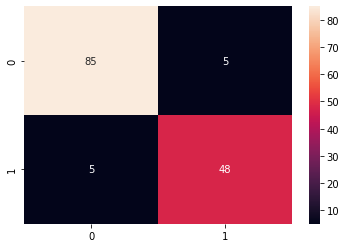

Model :  Logistic regression


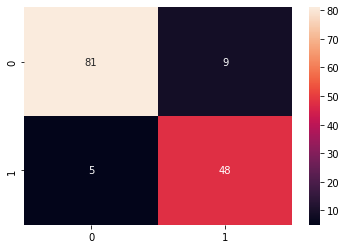

Model :  Decision Tree


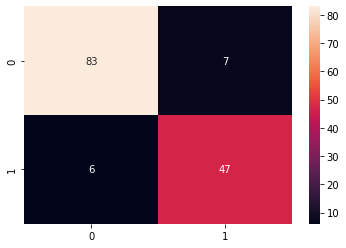

Model :  SVM


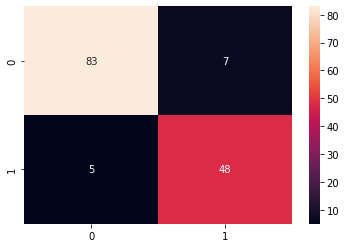

Model :  KNN


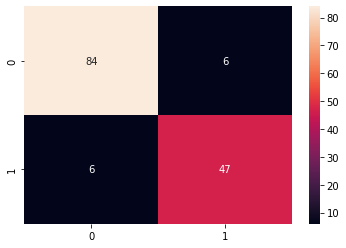

,Accuracy,Precision,Recall,F_measure
Random Forest,93.006993,0.905660,0.905660,0.905660
Logistic regression,90.209790,0.842105,0.905660,0.872727
Decision Tree,90.909091,0.870370,0.886792,0.878505
SVM,91.608392,0.872727,0.905660,0.888889
KNN,91.608392,0.886792,0.886792,0.886792


In [ ]:
model_names=['Random Forest','Logistic regression','Decision Tree','SVM',"KNN"]
predicted=combined_model(x_train,y_train)
Accuracy,Precision,Recall,F_measure=calculate_cm(predicted)
df2=pd.DataFrame({'Accuracy':Accuracy,'Precision':Precision,
                  'Recall':Recall,'F_measure':F_measure},
                 index=model_names)
df2

In [ ]:
#calculating the training and testing accuracy before hyper parameter tuning
old_train=accuracy_score(y_train,predicted[0].predict(x_train))*100
old_test=accuracy_score(y_test,predicted[0].predict(x_test))*100

print('Training accuracy  :',old_train)
print('Testing accuracy   :',old_test)

Training accuracy  : 100.0
Testing accuracy   : 93.00699300699301


**VISUALIZING DIFFERENT MODELS ACCURACY**

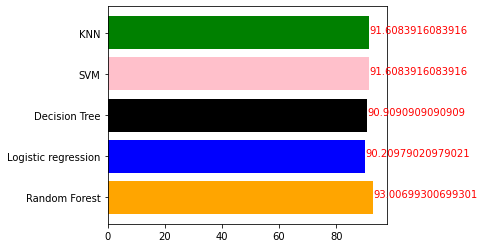

In [ ]:
#Comparison of accuracies
plt.figure(figsize=(5,4))
plt.barh(model_names,Accuracy,color=['orange','blue','black','pink','green'])
for index,value in enumerate(Accuracy):
    plt.text(value,index,str(value),color='red')
plt.show()

In [ ]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Code for random forest accuracy improvement
param_grid={'n_estimators':[10,50,100,200,250,300,350,400,500],
            'max_features':['sqrt','log2'],
            'criterion':['gini','entropy'],
            'min_samples_split':[4,5,6,7],
            'max_depth':[6,7,8,None],
            'bootstrap':[True,False],
            'min_samples_leaf':[1,2,4] }
rf=RandomForestClassifier(random_state=0)
clf2=GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,scoring='accuracy',verbose=5,n_jobs=-1)
clf2.fit(x_train, y_train)

Fitting 3 folds for each of 3456 candidates, totalling 10368 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 7, 8, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [4, 5, 6, 7],
                         'n_estimators': [10, 50, 100, 200, 250, 300, 350, 400,
                                          500]},
             scoring='accuracy', verbose=5)

In [ ]:
#Getting best fit values of hyper parameters
clf2.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 250}

In [ ]:
#Training the random forest with best fit values
clf3=RandomForestClassifier(bootstrap=True,
                            criterion= 'gini',
                            max_depth=7,
                            max_features= 'sqrt',
                            min_samples_leaf=1,
                            min_samples_split= 5,
                            n_estimators=250,
                            random_state=0)
clf3.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, max_features='sqrt', min_samples_split=5,
                       n_estimators=250, random_state=0)

In [ ]:
#Calculating the training and testing accuracy after hyper parameter tuning
new_train=accuracy_score(y_train,clf3.predict(x_train))*100
new_test=accuracy_score(y_test,clf3.predict(x_test))*100

print('Training accuracy  :',new_train)
print('Testing accuracy   :',new_test)

Training accuracy  : 99.76525821596243
Testing accuracy   : 93.00699300699301


In [ ]:
#visualizing the results before and aftter hyper parameter tuning
old=[old_train,old_test]
new=[new_train,new_test]
data=pd.DataFrame({'old':old,'new':new},index=['Training','Testing'])

data

,old,new
Training,100.000000,99.765258
Testing,93.006993,93.006993
